<a href="https://colab.research.google.com/github/ghostpasha01/Data_Analysis/blob/main/Unicorn_Companies_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import re as re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure 
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go

%matplotlib inline

In [ ]:
df=pd.read_csv("C://Users//Hp//Desktop//Veri setler(Yeni Site)//UnicornChallenge//Unicorn_Companies.csv")
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [ ]:
#dataset summary
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [ ]:
#descriptive statistics
df.describe(include='all')

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
count,1074,1074,1074,1074,1058,1074,1074,1074.000000,1074,1073
unique,1073,30,639,16,256,46,6,NaN,539,1058
top,Bolt,$1B,2021-07-13,Fintech,San Francisco,United States,North America,NaN,$1B,Sequoia Capital
freq,2,471,9,224,152,562,589,NaN,60,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.895717,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.698573,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1919.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN


# Data Preprocessing

In [ ]:
#check for duoplicated rows
df.duplicated().sum()

0

In [ ]:
#fill null values
values={"City":"Not Listed","Select Investors":"Not Listed"}
df=df.fillna(value=values)

In [ ]:
#incorrect data replacement
df.replace({'Industry': r'Artificial intelligence'},{'Industry':'Artifical Intelligence'},regex=True,inplace=True)

In [ ]:
df.loc[714,'Year Founded']=2013


In [ ]:
#date column conversion
df["Date Joined"] = pd.to_datetime(df["Date Joined"])

In [ ]:
#year joined
df['Year Joined'] = pd.DatetimeIndex(df['Date Joined']).year

In [ ]:
# timespan between being a unicorn and being founded
df['Timespan'] = df['Year Joined']-df['Year Founded']

In [ ]:
#remove currency sysmbols from valuation for easier calculation
def find_number_valuation(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)
df['Valuation']=df['Valuation'].apply(lambda x: find_number_valuation(x))
df["Valuation"] = pd.to_numeric(df["Valuation"])

In [ ]:
#remove currency symbols from funding column for easier calculation
def find_number_funding(text):
    mul = 1
    if text == "Unknown":
        return 0
    if text[-1] == 'M':
        mul = 0.001
    else :
        mul = 1
    num = re.findall(r'[0-9]+',text) 
    num = int(num[0])
    return num*mul
df['Funding']=df['Funding'].apply(lambda x: find_number_funding(x))

In [ ]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Timespan
0,Bytedance,180,2017-04-07,Artifical Intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S...",2017,5
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,10
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China...",2018,10
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG",2014,4
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita...",2011,6


In [ ]:
#We create a new dataset 
#This dataset consists of valuation data for each company an individual venture capitalist firm invested in
investors = df['Select Investors']
value = df['Valuation']
companies_list = set()
df_Investors = pd.DataFrame(columns=["investor", "valuation"])
for ind,inv in enumerate(investors):
    single_array = inv.split(', ')
    for val in single_array:
        obj = {'investor': val, 'valuation':  value[ind]}
        df_Investors = df_Investors.append(obj, ignore_index = True)

df_Investors["valuation"] = pd.to_numeric(df_Investors["valuation"])
print(df_Investors.head())

# Exploratorty Data Analysis

NameError: name 'Text' is not defined

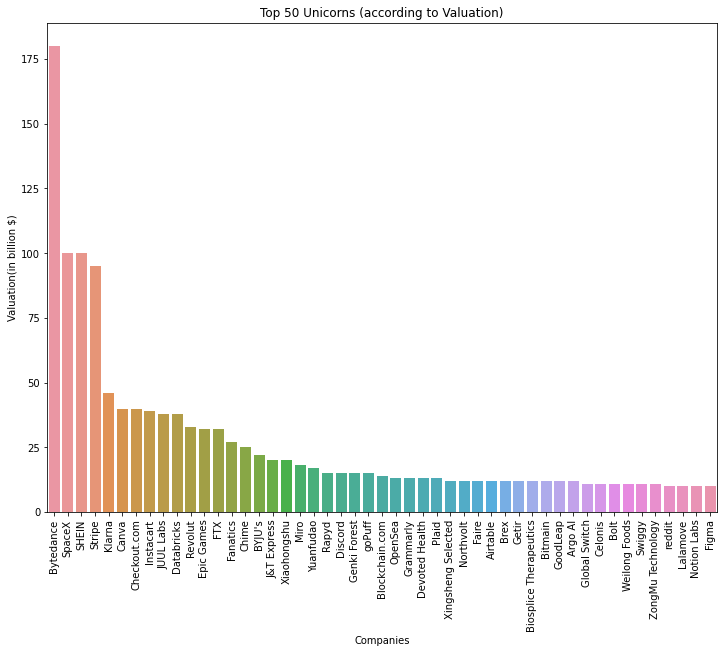

In [ ]:
#top 50 companies with highest valuation
dataset = df.sort_values('Valuation', ascending=False)

plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
g = sns.barplot(x = 'Company', y= 'Valuation', data = dataset[:50])
g.set( xlabel = "Companies", ylabel = "Valuation(in billion $)", title= 'Top 50 Unicorns (according to Valuation)')
[Text(0.5, 0, 'Companies'),
 Text(0, 0.5, 'Valuation(in billion $)'),
 Text(0.5, 1.0, 'Top 50 Unicorns (according to Valuation)')]

In [ ]:
# top 50 companies highest funding
dataset_funding = df.sort_values('Funding', ascending=False).reset_index()
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
g = sns.barplot(x = 'Company', y= 'Funding', data = dataset_funding[:50])
g.set( xlabel = "Companies", ylabel = "Funding(in billion $)", title= 'Top 50 Unicorns (according to Funding)')

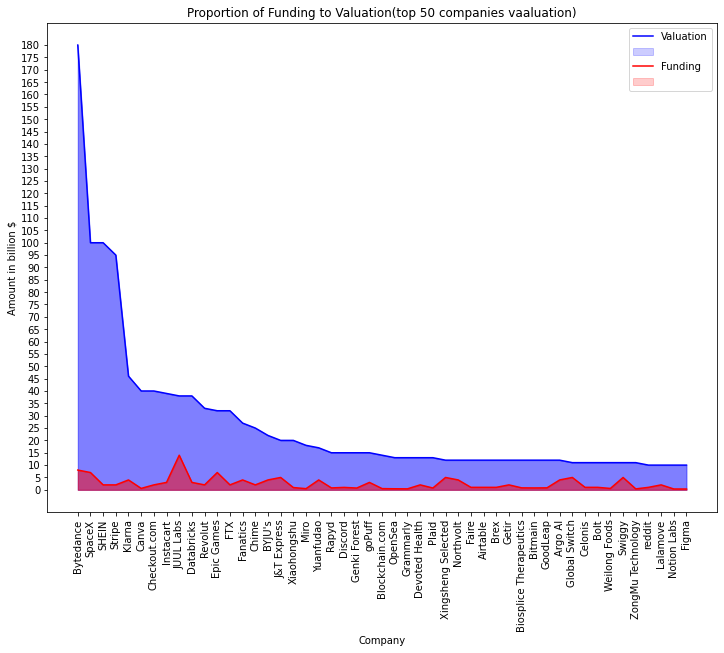

In [ ]:
#proportion of funding to valuation top 50 companies valuation
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
plt.yticks(np.arange(0, dataset['Valuation'].max() + 1, 5))
sns.lineplot(data = dataset[:50], x = dataset
             ['Company'][:50], y = dataset['Valuation'][:50] ,color="b")
sns.lineplot(data = dataset[:50], x = dataset['Company'][:50], y = dataset['Funding'][:50] ,color="r")

plt.title('Proportion of Funding to Valuation(top 50 companies vaaluation)')
plt.ylabel('Amount in billion $')
plt.fill_between(dataset['Company'][:50], dataset['Valuation'][:50], color="blue", alpha=0.5)
plt.fill_between(dataset['Company'][:50], dataset['Funding'][:50], color="red", alpha=0.5)
plt.legend(labels=['Valuation','','Funding',''])
plt.show()

[Text(0.5, 0, 'Country'),
 Text(0, 0.5, 'Company Count'),
 Text(0.5, 1.0, 'Unicorns Per Country')]

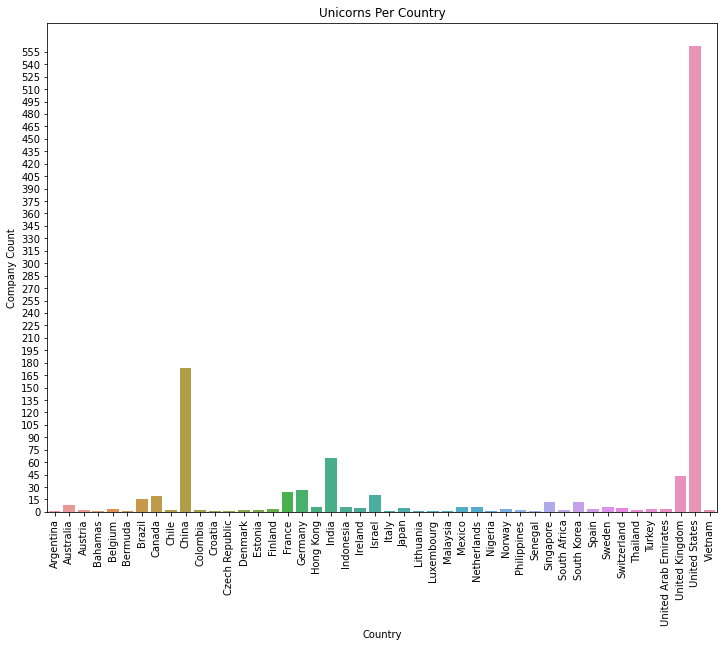

In [ ]:
#unicorns per country
df_ = dataset.groupby('Country')['Company'].count().reset_index()
length = max(df_['Company'])
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
plt.yticks(np.arange(0, length + 1, 15))
g = sns.barplot(x = 'Country', y= 'Company', data = df_)
g.set( xlabel = "Country", ylabel = "Company Count", title= 'Unicorns Per Country')

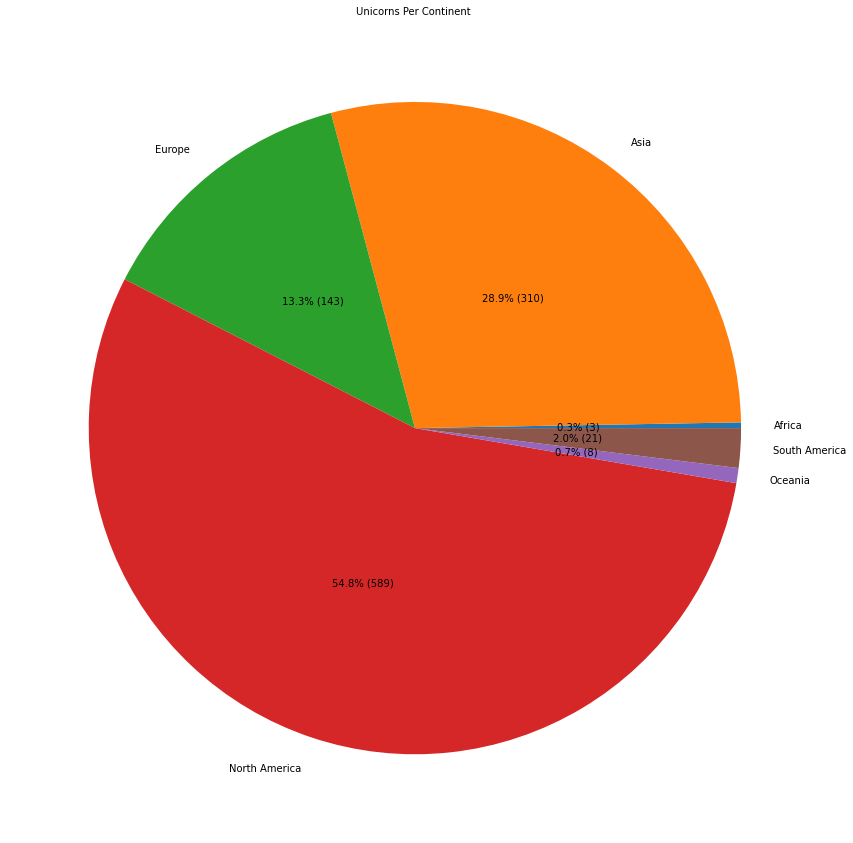

In [ ]:
#unicorns per continent
df_ = dataset.groupby('Continent')['Company'].count().reset_index()
Continent_array = df_['Continent'].to_numpy()
pie, ax = plt.subplots(figsize=[15,15])
labels = Continent_array
plt.pie(x=df_['Company'], autopct=lambda p: '{:.1f}% ({:.0f})'.format(p,p*df_['Company'].sum()/100.0), labels=labels, pctdistance=0.5)
plt.title("Unicorns Per Continent ", fontsize=10);

[Text(0.5, 0, 'Industry'),
 Text(0, 0.5, 'Company Count'),
 Text(0.5, 1.0, 'Unicorns Per Industry')]

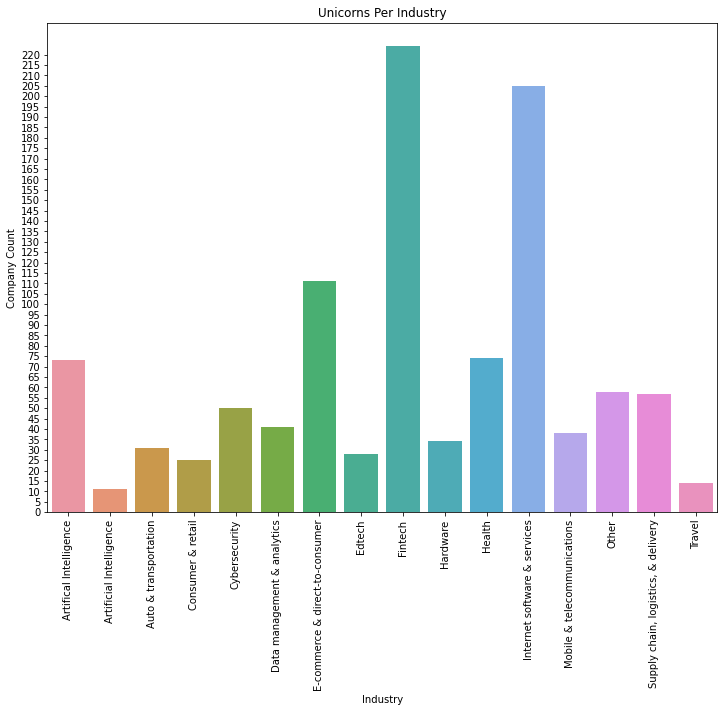

In [ ]:
#unicorns per industry
df_ = dataset.groupby('Industry')['Company'].count().reset_index()
length = max(df_['Company'])
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
plt.yticks(np.arange(0, length + 1, 5))
g = sns.barplot(x = 'Industry', y= 'Company', data = df_)
g.set( xlabel = "Industry", ylabel = "Company Count", title= 'Unicorns Per Industry')

[Text(0.5, 0, 'Industry'),
 Text(0, 0.5, 'Valuation (billion $)'),
 Text(0.5, 1.0, 'Unicorns Valuation Per Industry')]

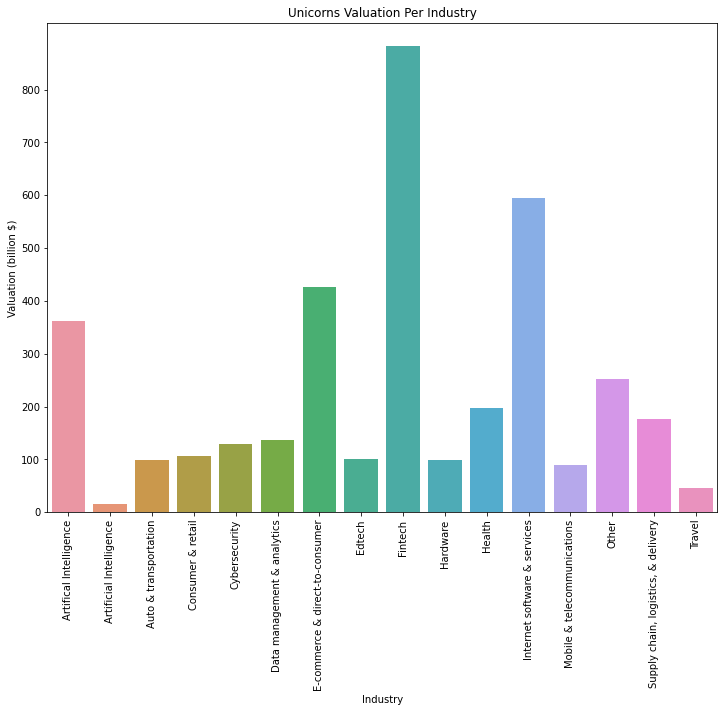

In [ ]:
#Unicorns Valuation by industry
df_ = dataset.groupby('Industry')['Valuation'].sum().reset_index()
length = max(df_['Valuation'])
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
plt.yticks(np.arange(0, length + 1, 100))
g = sns.barplot(x = 'Industry', y= 'Valuation', data = df_)
g.set( xlabel = "Industry", ylabel = "Valuation (billion $)", title= 'Unicorns Valuation Per Industry')

[Text(0.5, 0, 'Industry'),
 Text(0, 0.5, 'Funding (billion $)'),
 Text(0.5, 1.0, 'Unicorns Funding Per Industry')]

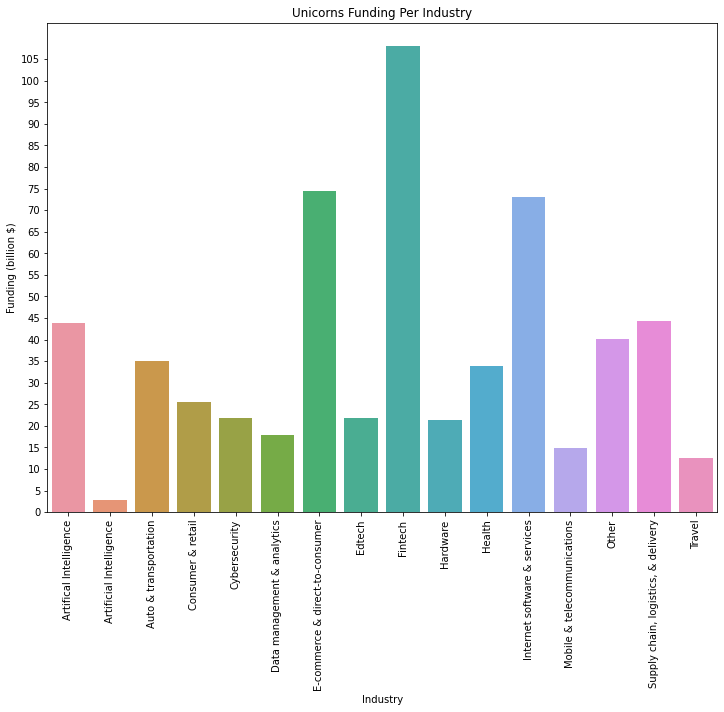

In [ ]:
#Unicorns Funding per industry
df_ = dataset.groupby('Industry')['Funding'].sum().reset_index()
length = max(df_['Funding'])
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
plt.yticks(np.arange(0, length + 1, 5))
g = sns.barplot(x = 'Industry', y= 'Funding', data = df_)
g.set( xlabel = "Industry", ylabel = "Funding (billion $)", title= 'Unicorns Funding Per Industry')

[Text(0.5, 0, 'Country'),
 Text(0, 0.5, 'Funding (billion $)'),
 Text(0.5, 1.0, 'Unicorns funding Per Country')]

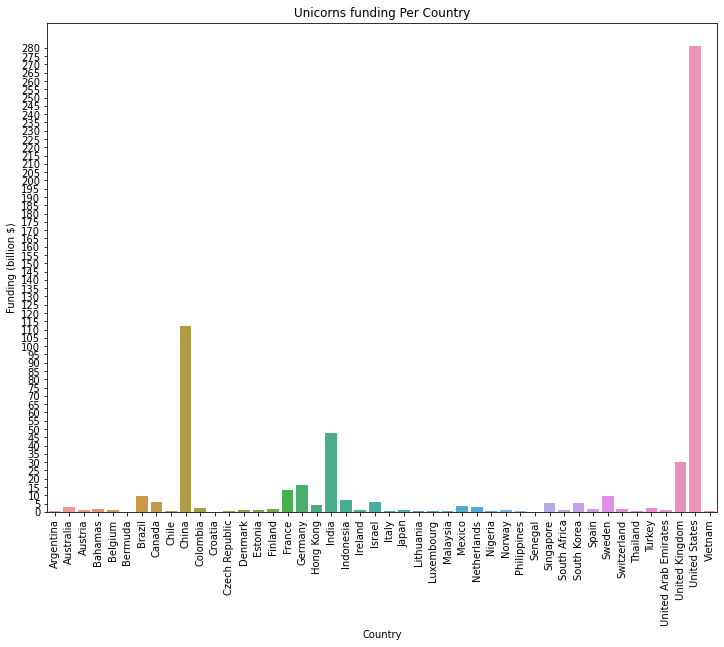

In [ ]:
#unicorn funding  per country
df_ = dataset.groupby('Country')['Funding'].sum().reset_index()
length = max(df_['Funding'])
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
plt.yticks(np.arange(0, length + 1, 5))
g = sns.barplot(x = 'Country', y= 'Funding', data = df_)
g.set( xlabel = "Country", ylabel = "Funding (billion $)", title= 'Unicorns funding Per Country')

[Text(0.5, 0, 'City'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Unicorns per City(Top 50)')]

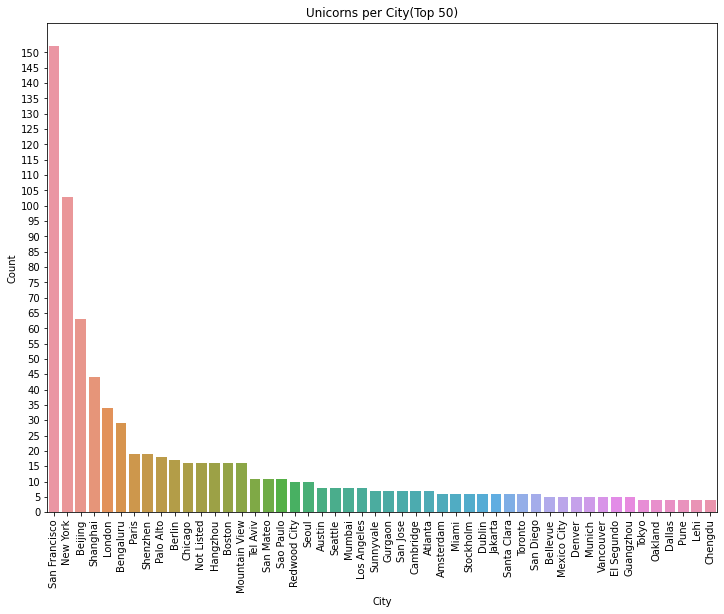

In [ ]:
#top 50 cities where unicorns are
df_ = dataset.groupby('City').size().reset_index()
df_ = df_.sort_values(0, ascending=False)

length = max(df_[0])
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
plt.yticks(np.arange(0, length + 1, 5))
g = sns.barplot(x = 'City', y= 0, data = df_[:50])
g.set( xlabel = "City", ylabel = "Count", title= 'Unicorns per City(Top 50)')

[Text(0.5, 0, 'Industry'),
 Text(0, 0.5, 'Time(yrs)'),
 Text(0.5, 1.0, 'Average Timespan per Industry(Unicorn status)')]

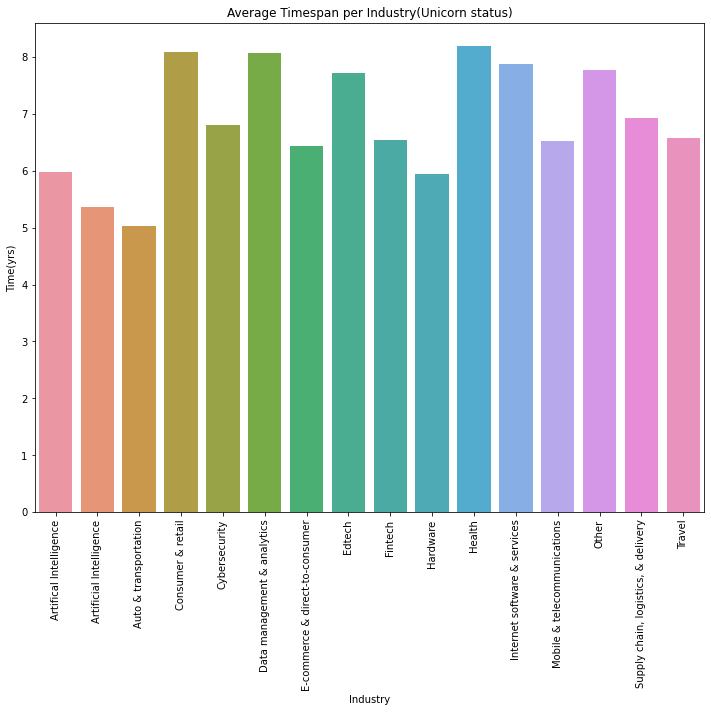

In [ ]:
#Average timespan to achieve unicorn status per industry
df_ = dataset.groupby('Industry')['Timespan'].mean().reset_index()
length = max(df_['Timespan'])
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
plt.yticks(np.arange(0, length + 1, 1))
g = sns.barplot(x = 'Industry', y= 'Timespan', data = df_)
g.set( xlabel = "Industry", ylabel = "Time(yrs)", title= 'Average Timespan per Industry(Unicorn status)')

[Text(0.5, 0, 'Country'),
 Text(0, 0.5, 'Time(yrs)'),
 Text(0.5, 1.0, 'Average Timespan per Country(Unicorn status)')]

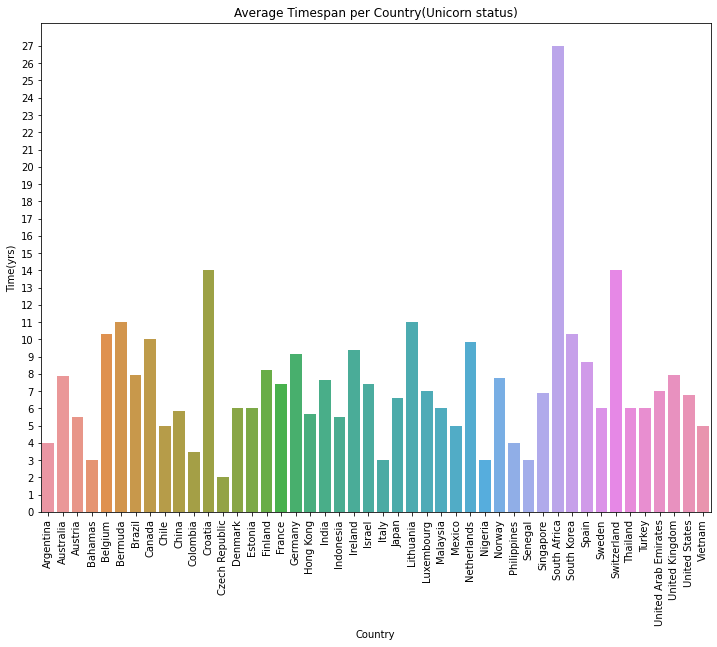

In [ ]:
#Average timespan to achieve unicorn status per country
df_ = dataset.groupby('Country')['Timespan'].mean().reset_index()
length = max(df_['Timespan'])
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
plt.yticks(np.arange(0, length + 1, 1))
g = sns.barplot(x = 'Country', y= 'Timespan', data = df_)
g.set( xlabel = "Country", ylabel = "Time(yrs)", title= 'Average Timespan per Country(Unicorn status)')

[Text(0.5, 0, 'Continent'),
 Text(0, 0.5, 'Time(yrs)'),
 Text(0.5, 1.0, 'Average Timespan per Continent(Unicorn status)')]

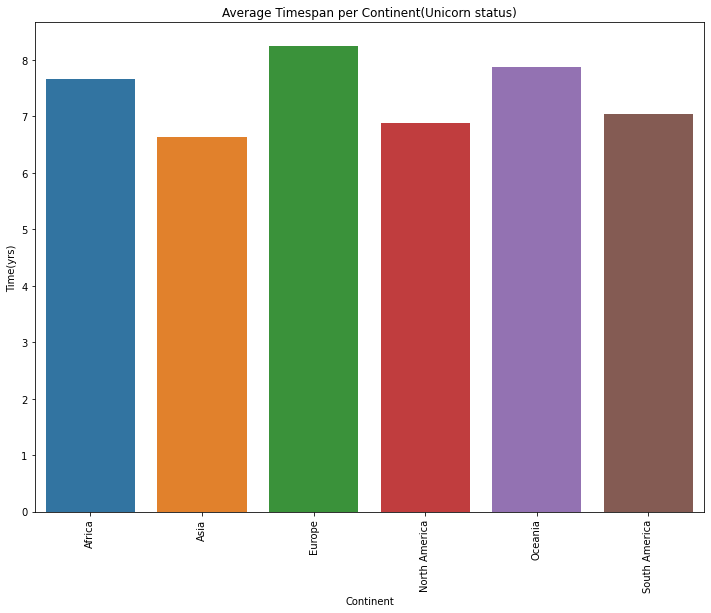

In [ ]:
#Average timespan to achieve unicorn status per continent
df_ = dataset.groupby('Continent')['Timespan'].mean().reset_index()
length = max(df_['Timespan'])
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
plt.yticks(np.arange(0, length + 1, 1))
g = sns.barplot(x = 'Continent', y= 'Timespan', data = df_)
g.set( xlabel = "Continent", ylabel = "Time(yrs)", title= 'Average Timespan per Continent(Unicorn status)')

[Text(0.5, 0, 'Company'),
 Text(0, 0.5, 'Time(yrs)'),
 Text(0.5, 1.0, 'Unicorn status achievement(time elapsed)')]

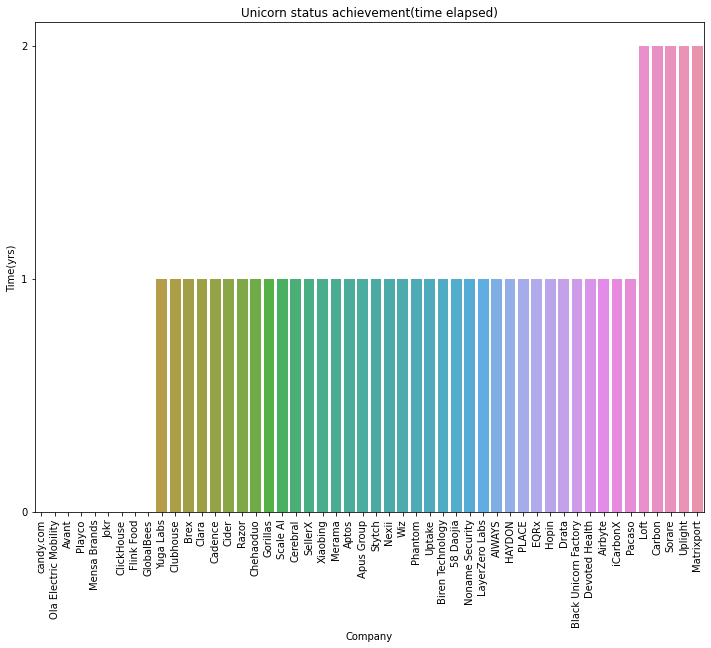

In [ ]:
#Fastest to achieve unicorn status (company)
#0 yrs representing within months
df_ = dataset.groupby(['Company','Timespan']).size().reset_index()
df_ = df_.sort_values('Timespan', ascending=True)

length = max(df_['Timespan'])
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
plt.yticks(np.arange(0, length + 1, 1))
g = sns.barplot(x = 'Company', y= 'Timespan', data = df_[:50])
g.set( xlabel = "Company", ylabel = "Time(yrs)", title= 'Unicorn status achievement(time elapsed)')

[Text(0.5, 0, 'Investors'),
 Text(0, 0.5, 'Amount(billion $)'),
 Text(0.5, 1.0, 'Total Worth Investments (Investors, top 50)')]

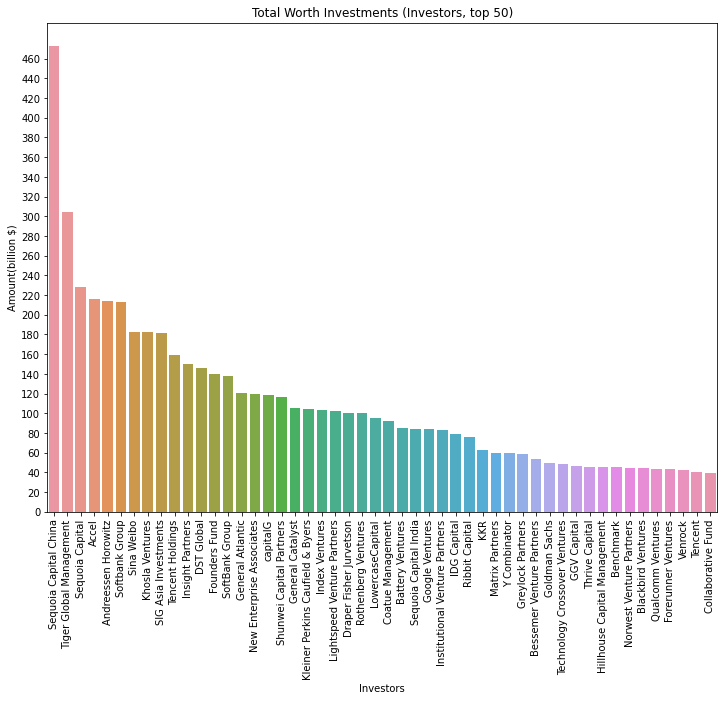

In [ ]:
# Investors, Total Worth Investments Top 50
df_ = df_Investors.groupby("investor")['valuation'].sum().reset_index()
df_ = df_.sort_values('valuation', ascending=False)
length = max(df_['valuation'])

plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
plt.yticks(np.arange(0, length + 1, 20))
g = sns.barplot(x = 'investor', y= 'valuation', data = df_[:50])
g.set( xlabel = "Investors", ylabel = "Amount(billion $)", title= 'Total Worth Investments (Investors, top 50)')

[Text(0.5, 0, 'Investor'),
 Text(0, 0.5, 'Fundings made'),
 Text(0.5, 1.0, 'Number of fundings per investor(Top 50)')]

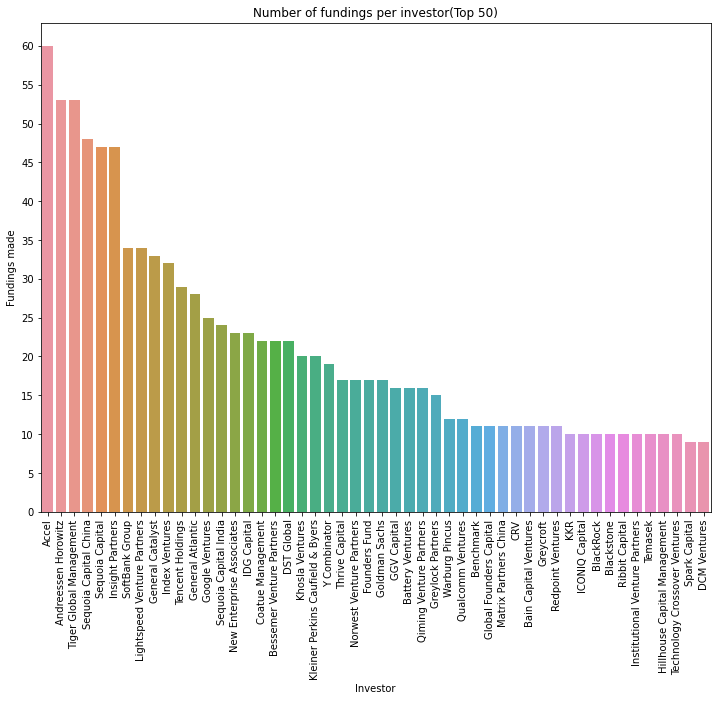

In [ ]:
#proactive investment firms
df_= df_Investors.groupby("investor").size().reset_index()
df_ = df_.sort_values(0, ascending=False)

length = max(df_[0])
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
plt.yticks(np.arange(0, length + 1, 5))
g = sns.barplot(x = 'investor', y= 0, data = df_[:50])
g.set( xlabel = "Investor", ylabel = "Fundings made", title= 'Number of fundings per investor(Top 50)')